# Optical Character Recognition
 
**Contents :**
	1. Image Source
	2. Deskewing
	3. Character Recognising Algorithm
		- Clustering of points in an Image(Land marks)
		- Finding Shortest Path
		- Representing Images


** Summary: **

- After getting the Images,Deskewing of images should be done.
- Take a single image and get the landmarks(Cluster points).
- Find the shortest path through the landmarks possible and we can represent the landmarks and embed the shortest path into the landmarks so that we can get a clear picture of the obtained shortest path.
- Clustering the whole image data based on their similarities and divide them accordingly
	 (Numbers and Alphabets) using Dictionaries and storing the obtained data in Pickle file.



**Introduction :**
				
- This code is about regarding getting the land marks the characters such as alphabets and numbers. 	
- The Interface has been used to draw the image and the image will be taken as input for the test.
- It consists of basic python coding such as lists,dictionaries,arrays and matrix.		
- For the backend we used libraries such as math,copy,numpy,matplotlib,scipy,scikit-learn,PIL and pickle.
- For Frontend we used libraries such as tkinter for Graphics.


In [1]:
import numpy as np
import matplotlib.pyplot as graph
import scipy as sp
import math
import mnist
train_images= mnist.train_images()
train_labels= mnist.train_labels()
test_images= mnist.test_images()
test_labels= mnist.test_labels()

In [2]:
###########     DESKEWING     ###########

from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    
    return interpolation.affine_transform(image,affine,offset=offset)

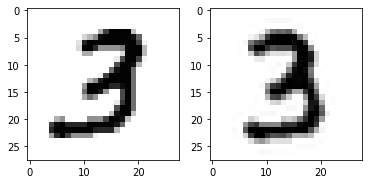

hello
[[ 5 10]
 [ 5 11]
 [ 5 12]
 [ 5 13]
 [ 5 14]
 [ 5 15]
 [ 6 10]
 [ 6 11]
 [ 6 12]
 [ 6 13]
 [ 6 14]
 [ 6 15]
 [ 6 16]
 [ 7  8]
 [ 7  9]
 [ 7 10]
 [ 7 15]
 [ 7 16]
 [ 7 17]
 [ 8 16]
 [ 8 17]
 [ 8 18]
 [ 9 16]
 [ 9 17]
 [ 9 18]
 [10 16]
 [10 17]
 [11 15]
 [11 16]
 [11 17]
 [12 14]
 [12 15]
 [12 16]
 [12 17]
 [13 13]
 [13 14]
 [13 15]
 [13 16]
 [13 17]
 [14 12]
 [14 13]
 [14 14]
 [14 15]
 [14 16]
 [14 17]
 [14 18]
 [15 11]
 [15 12]
 [15 13]
 [15 17]
 [15 18]
 [16 18]
 [17 18]
 [17 19]
 [18 18]
 [18 19]
 [19 18]
 [19 19]
 [20 17]
 [20 18]
 [20 19]
 [21  8]
 [21 13]
 [21 14]
 [21 15]
 [21 16]
 [21 17]
 [21 18]
 [22  7]
 [22  8]
 [22  9]
 [22 10]
 [22 11]
 [22 12]
 [22 13]
 [22 14]
 [22 15]
 [22 16]
 [22 17]
 [23  8]
 [23  9]
 [23 10]]


In [3]:
img_no = 107
number=3
graph.subplot(1, 2, 1)
graph.imshow(255-train_images[img_no], cmap = 'gray')

newim = deskew(train_images[img_no])  # Caling deskew function
graph.subplot(1, 2, 2)
graph.imshow(255-newim, cmap = 'gray')
#print(newim)
graph.show()

x1,x2 = [],[]  # Declaring lists to get points 
# Loop for getting coordinates from the image
for i in range(0,28):
    for j in range(0,28):
        if(newim[i][j] >200):
            x1.append(i)
            x2.append(j)
x= []
x.append(x1)
x.append(x2)
#print(x1)
#print(x2)  
data= np.matrix(x)
data= np.array(data)
print("hello")
data= data.T
print(data)

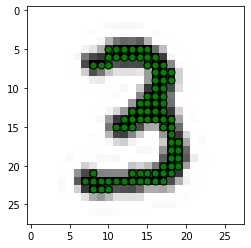

In [4]:
x1= np.array(x1)
#print(x1)
x2= np.array(x2)
graph.imshow(255-newim, cmap = 'gray')
graph.scatter(x2,x1,s = 50, c='green',edgecolor= 'black',label = 'cluster')
graph.show()

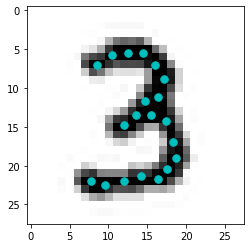


---------------------Cluster centers---------------------

[[14.2        17.4       ]
 [21.4        14.2       ]
 [ 5.5        14.5       ]
 [22.          7.75      ]
 [20.5        17.5       ]
 [ 8.83333333 17.16666667]
 [13.5        13.5       ]
 [17.         18.25      ]
 [ 5.8        10.4       ]
 [11.66666667 14.66666667]
 [14.75       12.        ]
 [22.5         9.5       ]
 [ 7.          8.5       ]
 [11.2        16.4       ]
 [19.         18.75      ]
 [13.5        15.5       ]
 [ 7.         16.        ]
 [21.66666667 16.33333333]
 [22.         12.        ]
 [ 5.5        12.5       ]]

---------------------------------------------------------



In [5]:
#############      CLUSTERING       #################

from sklearn.cluster import KMeans
num_clusters = 20
km = KMeans(n_clusters = num_clusters,n_init = 10,max_iter=300, tol = 1e-04,random_state = 0)
km= km.fit(data)  # It fits the data given data and gives required points
lm= km.cluster_centers_
graph.imshow(255-newim, cmap = 'gray')
graph.plot(km.cluster_centers_[:,1], km.cluster_centers_[:,0], 'c.', MarkerSize = 15)
graph.show()
print("\n---------------------Cluster centers---------------------\n")
print(lm)
print("\n---------------------------------------------------------\n")

In [6]:
###########       EUCIDIAN-DISTANCES     #############


import matrix2 as matrix2
# This function calculates the Euclidian distance between two points
def euclid(x1,y1,x2,y2):
    d= np.sqrt((y2-y1)**2+(x2-x1)**2)
    return(d)
# Finds distance to every point to the other point
def fun(lm,i,n):
    x1,y1,x2,y2= 0,0,0,0
    lm1=[]
    for j in range(0,n):
        x1,y1= lm[i,0],lm[i,1]
        x2,y2= lm[j,0],lm[j,1]
        lm1.append(euclid(x1,y1,x2,y2))
    return(lm1)
# All that lists of distances will be inserted in a single list.
def fun1(lm,n):
    lm2= []
    for i in range(0,n):
        lm2.append(fun(lm,i,n))
    return(lm2)


print("\nList of Distances: ")
n= num_clusters
lm2= []
lm2= np.array(fun1(lm,n))
print(lm2)
list1= matrix2.fun3(lm2,n)
print("\n\nShortest Path: ",list1)


List of Distances: 
[[ 0.          7.87908624  9.17060521 12.40816264  6.3007936   5.37173674
   3.96232255  2.92617498 10.93434955  3.72677996  5.42793699 11.45862121
  11.44770719  3.16227766  4.98623104  2.02484567  7.33484833  7.54247233
   9.48683298  9.98498873]
 [ 7.87908624  0.         15.90282994  6.47784686  3.42052628 12.91209597
   7.93095202  5.98017558 16.05615147  9.74451413  7.00446286  4.82700735
  15.4870914  10.43455797  5.14417146  8.00624756 14.51206395  2.1499354
   2.28035085 15.99062225]
 [ 9.17060521 15.90282994  0.         17.82729649 15.29705854  4.26874949
   8.06225775 12.0959704   4.11096096  6.16891851  9.58188395 17.72004515
   6.18465844  6.00832755 14.15317985  8.06225775  2.12132034 16.27028648
  16.68831927  2.        ]
 [12.40816264  6.47784686 17.82729649  0.          9.86470983 16.18748659
  10.26218788 11.62970335 16.41531297 12.43455088  8.40386816  1.82002747
  15.0187383  13.83699751 11.40175425 11.50271707 17.11906832  8.58980339
   4.25    

List of Number 3: [107, 111, 130, 135, 136, 149, 157, 179, 181, 198]

Shortest path in the order: 
 [[22.          7.75      ]
 [22.5         9.5       ]
 [22.         12.        ]
 [21.4        14.2       ]
 [21.66666667 16.33333333]
 [20.5        17.5       ]
 [19.         18.75      ]
 [17.         18.25      ]
 [14.2        17.4       ]
 [13.5        15.5       ]
 [13.5        13.5       ]
 [14.75       12.        ]
 [11.66666667 14.66666667]
 [11.2        16.4       ]
 [ 8.83333333 17.16666667]
 [ 7.         16.        ]
 [ 5.5        14.5       ]
 [ 5.5        12.5       ]
 [ 5.8        10.4       ]
 [ 7.          8.5       ]]


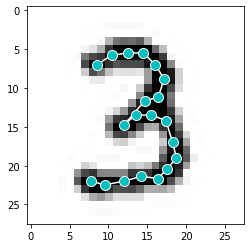

In [7]:
lbl= []
# Getting the images in a list
for i in range(100,200):
    if(train_labels[i] == number):
        lbl.append(i)
print("List of Number "+str(number)+": "+str(lbl))

"""for i in range(0,len(lbl)):
    newim = deskew(train_images[lbl[i]]) """


###########----PLOT-----##########

list2=np.array(list1[0],dtype= np.int64)
order= list2[:-1]

""" print(list2)
print(list2.shape)
#order= list2[list2.size-1,] """

ordered_lm = np.zeros((num_clusters,2)) # intialising ordered_lm with zeroes with shape(num_clusters,2)
j = 0
# loop for getting the ordered list
for i in order:
	ordered_lm[j,:] = lm[int(i),:]
	j = j+1

print("\nShortest path in the order: \n",ordered_lm)
x,y = ordered_lm[:,0],ordered_lm[:,1] # Getting x,y to plot 

graph.imshow(255-newim, cmap = 'gray')
graph.plot(y,x,'wo-',mfc='c',ms= '10')
graph.show()